1591187094.9288476
alex_transfer_8_ADAM
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.3420, Accuracy: 57.2398%,Valid: Loss: 0.7011, Accuracy: 72.8659%,Time: 5.9548s
Epoch: 2
Epoch: 002, Training: Loss: 0.4638, Accuracy: 83.5407%,Valid: Loss: 0.7241, Accuracy: 74.3902%,Time: 5.9071s
Epoch: 3
Epoch: 003, Training: Loss: 0.2111, Accuracy: 92.1946%,Valid: Loss: 0.5878, Accuracy: 81.7073%,Time: 6.0819s
Epoch: 4
Epoch: 004, Training: Loss: 0.0896, Accuracy: 97.0588%,Valid: Loss: 0.8444, Accuracy: 79.5732%,Time: 6.1548s
Epoch: 5
Epoch: 005, Training: Loss: 0.0609, Accuracy: 98.0204%,Valid: Loss: 0.7058, Accuracy: 81.0976%,Time: 5.5626s
Epoch: 6
Epoch: 006, Training: Loss: 0.0666, Accuracy: 98.3597%,Valid: Loss: 0.7723, Accuracy: 80.1829%,Time: 6.0384s
Epoch: 7
Epoch: 007, Training: Loss: 0.0295, Accuracy: 98.9819%,Valid: Loss: 0.7905, Accuracy: 81.7073%,Time: 6.6707s
Epoch: 8
Epoch: 008, Training: Loss: 0.0119, Accuracy: 99.7172%,Valid: Loss: 0.7164, Accuracy: 84.4512%,Time: 5.8923s
Epoch: 

Epoch: 070, Training: Loss: 0.0009, Accuracy: 99.8869%,Valid: Loss: 1.5782, Accuracy: 84.1463%,Time: 6.4195s
Epoch: 71
Epoch: 071, Training: Loss: 0.0009, Accuracy: 99.9434%,Valid: Loss: 1.5812, Accuracy: 84.1463%,Time: 6.4460s
Epoch: 72
Epoch: 072, Training: Loss: 0.0008, Accuracy: 99.8869%,Valid: Loss: 1.5890, Accuracy: 84.1463%,Time: 5.8145s
Epoch: 73
Epoch: 073, Training: Loss: 0.0009, Accuracy: 99.9434%,Valid: Loss: 1.5900, Accuracy: 84.1463%,Time: 6.1543s
Epoch: 74
Epoch: 074, Training: Loss: 0.0009, Accuracy: 99.9434%,Valid: Loss: 1.5920, Accuracy: 84.1463%,Time: 5.9162s
Epoch: 75
Epoch: 075, Training: Loss: 0.0009, Accuracy: 99.8869%,Valid: Loss: 1.5985, Accuracy: 84.1463%,Time: 5.7626s
Epoch: 76
Epoch: 076, Training: Loss: 0.0009, Accuracy: 99.9434%,Valid: Loss: 1.6030, Accuracy: 84.1463%,Time: 5.9130s
Epoch: 77
Epoch: 077, Training: Loss: 0.0008, Accuracy: 99.9434%,Valid: Loss: 1.6079, Accuracy: 84.1463%,Time: 5.9807s
Epoch: 78
Epoch: 078, Training: Loss: 0.0009, Accuracy: 99

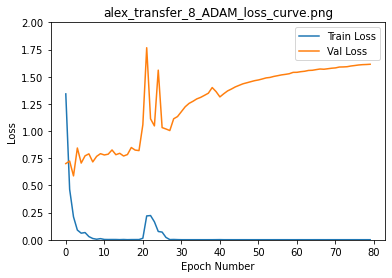

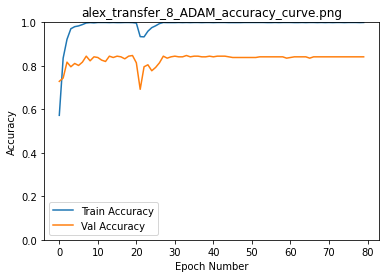

490.1414098739624


In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.alexnet(pretrained=True)
time1 = time.time()
print(time1)
device = 8
model_name_list = ["alex_transfer"]
#model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(9216,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(4096,256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256,6))
model
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+str(8)+'_'+"ADAM"
print(file_name)
optimizer = optim.Adam(model.parameters(),lr=0.001)
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=80,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)